# Kindle Book Recommender System

### Imports

In [1]:
#!pip install texthero
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df_meta = pd.read_csv('C:\\Users\\danie\\Desktop\\meta_use.csv')
df_meta.drop(columns = 'Unnamed: 0', inplace=True)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478025 entries, 0 to 478024
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  478025 non-null  object
 1   title     476229 non-null  object
 2   brand     477393 non-null  object
 3   details   478025 non-null  object
 4   asin      478025 non-null  object
dtypes: object(5)
memory usage: 18.2+ MB


In [3]:
df_meta.head()

,category,title,brand,details,asin
0,"['Kindle Store', 'Kindle eBooks', 'Science Fic...",NaN,Arthur K. Barnes,"{'File Size:': '295 KB', 'Print Length:': '113...",B000FA5KKA
1,"['Kindle Store', 'Kindle eBooks', 'Biographies...",NaN,Jean Marie Stine,"{'File Size:': '262 KB', 'Print Length:': '103...",B000FA5KJQ
2,"['Kindle Store', 'Kindle eBooks', 'Science Fic...",NaN,Arthur K. Barnes,"{'File Size:': '251 KB', 'Print Length:': '116...",B000FA5NSO
3,"['Kindle Store', 'Kindle eBooks', 'Business & ...",NaN,Visit Amazon's Ethan M. Rasiel Page,"{'File Size:': '953 KB', 'Print Length:': '187...",B000FA5KX2
4,"['Kindle Store', 'Kindle eBooks', 'Business & ...",NaN,John Hayden,"{'File Size:': '627 KB', 'Print Length:': '240...",B000FA5M3U


In [4]:
df_meta.isna().sum()

category       0
title       1796
brand        632
details        0
asin           0
dtype: int64

In [5]:
df_meta.dropna(inplace=True)

In [6]:
asin_list = df_meta['asin'].tolist()

In [7]:
df_meta['category'].value_counts()

['Kindle Store', 'Kindle eBooks', 'Literature & Fiction']              147980
['Kindle Store', 'Kindle eBooks', 'Religion & Spirituality']            48422
['Kindle Store', 'Kindle eBooks', 'Romance']                            34237
['Kindle Store', 'Kindle eBooks', 'Science Fiction & Fantasy']          29180
['Kindle Store', 'Kindle eBooks', "Children's eBooks"]                  27289
['Kindle Store', 'Kindle eBooks', 'Business & Money']                   24217
['Kindle Store', 'Kindle eBooks', 'Health, Fitness & Dieting']          18679
['Kindle Store', 'Kindle eBooks', 'Mystery, Thriller & Suspense']       14859
['Kindle Store', 'Kindle eBooks', 'History']                            12786
['Kindle Store', 'Kindle eBooks', 'Biographies & Memoirs']              11532
['Kindle Store', 'Kindle eBooks', 'Cookbooks, Food & Wine']             10730
['Kindle Store', 'Kindle eBooks', 'Teen & Young Adult']                  8708
['Kindle Store', 'Kindle eBooks', 'Education & Teaching']       

In [8]:
details = list(df_meta['details'])

In [9]:
details

["{'File Size:': '298 KB', 'Print Length:': '168 pages', 'Simultaneous Device Usage:': 'Unlimited', 'Publisher:': 'Outskirts Press (April 16, 2007)', 'Publication Date:': 'April 16, 2007', 'Language:': 'English', 'ASIN:': 'B00128EFK0', 'Word Wise:': 'Enabled', 'Lending:': 'Enabled'}",
 "{'File Size:': '525 KB', 'Print Length:': '17 pages', 'Publisher:': 'Opera Journeys Publishing (January 4, 2008)', 'Publication Date:': 'January 4, 2008', 'Language:': 'English', 'ASIN:': 'B00129LKMK', 'Word Wise:': 'Not Enabled', 'Lending:': 'Enabled'}",
 "{'File Size:': '1066 KB', 'Print Length:': '207 pages', 'Page Numbers Source ISBN:': '1430305630', 'Simultaneous Device Usage:': 'Unlimited', 'Publisher:': 'Lulu.com; 4th edition (October 15, 2007)', 'Publication Date:': 'October 15, 2007', 'Language:': 'English', 'ASIN:': 'B0012AXRXO', 'Word Wise:': 'Enabled', 'Lending:': 'Enabled'}",
 "{'File Size:': '563 KB', 'Print Length:': '208 pages', 'Publication Date:': 'January 5, 2008', 'Language:': 'Engli

In [10]:
df_rev = pd.read_csv('C:\\Users\\danie\\Desktop\\rev_use.csv')
df_rev.drop(columns=['Unnamed: 0'], inplace=True)
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398711 entries, 0 to 1398710
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   overall     1398711 non-null  int64 
 1   reviewTime  1398711 non-null  object
 2   reviewerID  1398711 non-null  object
 3   asin        1398711 non-null  object
 4   reviewText  1398705 non-null  object
 5   summary     1398710 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.0+ MB


In [11]:
df_rev.head()

,overall,reviewTime,reviewerID,asin,reviewText,summary
0,4,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,"pretty good story, a little exaggerated, but I...",pretty good story
1,5,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,"If you've read other max brand westerns, you k...",A very good book
2,5,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,"Love Max, always a fun twist",Five Stars
3,5,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,"As usual for him, a good book",a good
4,5,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,MB is one of the original western writers and ...,A Western


In [12]:
df_rev = df_rev[df_rev['asin'].isin(asin_list)]

In [13]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395197 entries, 1389 to 1398710
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   overall     1395197 non-null  int64 
 1   reviewTime  1395197 non-null  object
 2   reviewerID  1395197 non-null  object
 3   asin        1395197 non-null  object
 4   reviewText  1395191 non-null  object
 5   summary     1395196 non-null  object
dtypes: int64(1), object(5)
memory usage: 74.5+ MB


In [14]:
df_rev.isna().sum()

overall       0
reviewTime    0
reviewerID    0
asin          0
reviewText    6
summary       1
dtype: int64

In [15]:
df_rev.dropna(inplace=True)

In [16]:
df_rev['reviewerID'].value_counts()

A2UNMDJYXPEQZ3    716
A3IQ0P3M39IY8U    716
A37LY77Q2YPJVL    652
A26GE9ZG68SKIQ    618
A2VXSQHJWZAQGY    613
                 ... 
A1F8W92SFZCQBL      1
AKQRA2NCSZ2W1       1
ADAC1DTAOM0VE       1
AXODB5AU8Y5L7       1
A3GXB2JKSSYBW4      1
Name: reviewerID, Length: 131022, dtype: int64

In [17]:
df_rev.to_csv('Data/df_all.csv')

In [18]:
df_rev5 = df_rev[df_rev['reviewerID'].map(df_rev['reviewerID'].value_counts()) > 4]

In [19]:
df_rev5['reviewerID'].value_counts()

A2UNMDJYXPEQZ3    716
A3IQ0P3M39IY8U    716
A37LY77Q2YPJVL    652
A26GE9ZG68SKIQ    618
A2VXSQHJWZAQGY    613
                 ... 
A36EUTE4ZHR243      5
A39LJFYTWIT59W      5
A354QFYZDY61BE      5
A1S0BJF79691A5      5
A1E1CAS09PJA43      5
Name: reviewerID, Length: 97588, dtype: int64

In [20]:
df_rev5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302158 entries, 1389 to 1398709
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   overall     1302158 non-null  int64 
 1   reviewTime  1302158 non-null  object
 2   reviewerID  1302158 non-null  object
 3   asin        1302158 non-null  object
 4   reviewText  1302158 non-null  object
 5   summary     1302158 non-null  object
dtypes: int64(1), object(5)
memory usage: 69.5+ MB


<AxesSubplot:>

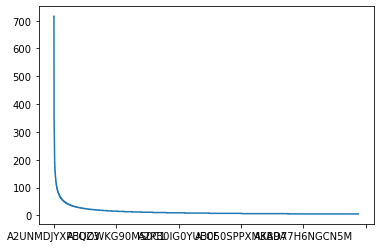

In [21]:
reviewers = df_rev5['reviewerID'].value_counts()
reviewers.plot()

In [22]:
df_rev5.to_csv('Data/df_rev5.csv')

In [23]:
asin_set = set(df_rev['asin'].tolist())

In [24]:
asin_set5 = set(df_rev5['asin'].tolist())

In [25]:
len(asin_set5)

93547

In [26]:
len(asin_set)

94029

In [27]:
df_meta_all = df_meta.copy()
df_meta_all = df_meta[df_meta['asin'].isin(asin_set)]

In [28]:
df_meta5 = df_meta.copy()
df_meta5 = df_meta[df_meta['asin'].isin(asin_set5)]

In [29]:
def getLastValue(aList):
    return aList[-1]

In [30]:
def meta_clean(data):
    data['category'] = data['category'].apply(eval)
    data['genre'] = data['category'].apply(getLastValue)
    data.drop(columns=['category'], inplace=True)
    data['details'] = data['details'].apply(eval)
    print_length = [d.get('Print Length:') for d in data['details']]
    data['print_length'] = print_length
    data['print_length'] = data['print_length'].str.extract('(\d+)', expand=False)
    data['print_length'] = data['print_length'].astype(float)
    word_wise = [d.get('Word Wise:') for d in data['details']]
    data['word_wise'] = word_wise
    lending = [d.get('Lending:') for d in data['details']]
    data['lending'] = lending
    bool_dict = {'Enabled': 1, 'Not Enabled': 0}
    data['word_wise'] = data['word_wise'].map(bool_dict)
    data['lending'] = data['lending'].map(bool_dict)
    data['brand'] = data['brand'].str.replace("Visit Amazon's", '')
    data['brand'] = data['brand'].str.replace("Page", '')
    data.drop(columns=['details'], inplace=True)
    return data.head()

In [31]:
meta_clean(df_meta_all)

<ipython-input-30-1dd7691d68b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'] = data['category'].apply(eval)
<ipython-input-30-1dd7691d68b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['category'].apply(getLastValue)
C:\Users\danie\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,title,brand,asin,genre,print_length,word_wise,lending
1039,God in the White House,Randall Balmer,B0012GTZCK,History,260.0,1,0
1053,Vingt Mille Lieues sous les mers (French Editi...,Jules Verne,B0012LHGJ4,Reference,606.0,0,1
1071,Wood-Carving Design and Workmanship - Kindle e...,George Jack,B0012RMVH0,Arts & Photography,310.0,0,0
1075,Souls Night (The Vampire Pacts) - Kindle edition,Kallysten,B0012TAD1O,Romance,74.0,1,1
1078,The Misplaced Horse (1) eBook,Constance Downes,B0012U0NKE,"Comics, Manga & Graphic Novels",444.0,0,1


In [32]:
df_meta_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94029 entries, 1039 to 478021
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         94029 non-null  object 
 1   brand         94029 non-null  object 
 2   asin          94029 non-null  object 
 3   genre         94029 non-null  object 
 4   print_length  93512 non-null  float64
 5   word_wise     94029 non-null  int64  
 6   lending       94029 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.7+ MB


In [33]:
df_meta_all.isna().sum()

title             0
brand             0
asin              0
genre             0
print_length    517
word_wise         0
lending           0
dtype: int64

In [34]:
df_meta_all['print_length'] = df_meta_all.groupby(['genre'], sort=False)['print_length'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-34-d112c23f9a80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_all['print_length'] = df_meta_all.groupby(['genre'], sort=False)['print_length'].apply(lambda x: x.fillna(x.mean()))


In [35]:
meta_clean(df_meta5)

<ipython-input-30-1dd7691d68b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'] = data['category'].apply(eval)
<ipython-input-30-1dd7691d68b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['category'].apply(getLastValue)
C:\Users\danie\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,title,brand,asin,genre,print_length,word_wise,lending
1039,God in the White House,Randall Balmer,B0012GTZCK,History,260.0,1,0
1053,Vingt Mille Lieues sous les mers (French Editi...,Jules Verne,B0012LHGJ4,Reference,606.0,0,1
1071,Wood-Carving Design and Workmanship - Kindle e...,George Jack,B0012RMVH0,Arts & Photography,310.0,0,0
1075,Souls Night (The Vampire Pacts) - Kindle edition,Kallysten,B0012TAD1O,Romance,74.0,1,1
1078,The Misplaced Horse (1) eBook,Constance Downes,B0012U0NKE,"Comics, Manga & Graphic Novels",444.0,0,1


In [36]:
df_meta5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93547 entries, 1039 to 478017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         93547 non-null  object 
 1   brand         93547 non-null  object 
 2   asin          93547 non-null  object 
 3   genre         93547 non-null  object 
 4   print_length  93036 non-null  float64
 5   word_wise     93547 non-null  int64  
 6   lending       93547 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.7+ MB


In [37]:
df_meta5.isna().sum()

title             0
brand             0
asin              0
genre             0
print_length    511
word_wise         0
lending           0
dtype: int64

In [38]:
df_meta5['print_length'] = df_meta_all.groupby(['genre'], sort=False)['print_length'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-38-b24ed72c1dde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta5['print_length'] = df_meta_all.groupby(['genre'], sort=False)['print_length'].apply(lambda x: x.fillna(x.mean()))


In [39]:
df_meta_all.to_csv('Data/meta_all.csv')
df_meta5.to_csv('Data/meta5.csv')

In [40]:
popular = df_rev.groupby(by = 'asin').count()
popular = popular.sort_values(by = 'overall', ascending=False)

In [41]:
popular.head()

,overall,reviewTime,reviewerID,reviewText,summary
asin,,,,,
B00YN6XHMU,1945,1945,1945,1945,1945
B00ESJ3S94,1110,1110,1110,1110,1110
B00C2WDD5I,901,901,901,901,901
B00IJYII4E,795,795,795,795,795
B015BIHKH6,724,724,724,724,724


In [42]:
df_most = df_rev5.loc[df_rev5['reviewerID'] == 'A3IQ0P3M39IY8U']
df_most['overall'].value_counts()

5    292
4    234
3    140
2     42
1      8
Name: overall, dtype: int64

In [43]:
df_2most = df_rev5.loc[df_rev5['reviewerID'] == 'A2UNMDJYXPEQZ3']
df_2most['overall'].value_counts()

5    265
4    193
3    157
2     76
1     25
Name: overall, dtype: int64

In [44]:
df_3most = df_rev5.loc[df_rev5['reviewerID'] == 'A37LY77Q2YPJVL']
df_3most['overall'].value_counts()

5    517
4    135
Name: overall, dtype: int64

In [45]:
df_4most = df_rev5.loc[df_rev5['reviewerID'] == 'A26GE9ZG68SKIQ']
df_4most['overall'].value_counts()

4    535
5     57
3     25
2      1
Name: overall, dtype: int64

In [46]:
df_5most = df_rev5.loc[df_rev5['reviewerID'] == 'A2VXSQHJWZAQGY']
df_5most['overall'].value_counts()

3    248
4    236
2    104
5     15
1     10
Name: overall, dtype: int64

In [47]:
df_books_rev = df_rev.groupby(['asin'], as_index = False).agg({'reviewText': ' '.join})
df_books_rev.to_csv('Data/df_books_rev.csv')

In [48]:
df_books_rev.head()

,asin,reviewText
0,B0012GTZCK,Not what I was expecting. I was looking for a ...
1,B0012LHGJ4,IT WAS DONE AS A FILM IN THE 1950-60s. VERY P...
2,B0012RMVH0,Needs pictures Excellent book. This is somethi...
3,B0012TAD1O,She always delivers with an exciting storyline...
4,B0012U0NKE,"<a data-hook=""product-link-linked"" class=""a-li..."


In [49]:
df_books_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94029 entries, 0 to 94028
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   asin        94029 non-null  object
 1   reviewText  94029 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB
